<a href="https://colab.research.google.com/github/NQT2906/CS114.K21/blob/Thi_GK/Thi_GK_Round_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clone data from git**

**Load dữ liệu từ github ở link "https://github.com/NQT2906/CS114.K21" về và đặt tên là Dataset**

In [0]:
!git clone "https://github.com/NQT2906/CS114.K21" Dataset

Cloning into 'Dataset'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 822 (delta 57), reused 59 (delta 16), pack-reused 677
Receiving objects: 100% (822/822), 935.95 MiB | 35.07 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Checking out files: 100% (1309/1309), done.


In [0]:
cd Dataset/Time

/content/Dataset/Time


# **Import library**

**Import những thư viện cần thiết lúc đầu**

In [0]:
import pandas as pd

# **Read data**

**Đọc dữ liệu với phương thức read_csv của thư viện pandas. 'data2.txt' là tên của file dữ liệu, sep = ',' là cho dữ liệu thêm 1 cột khi gặp dấu ','. data.columns = ['Size', 'Time'] là đặt tên cho 2 cột dữ liệu vừa chia là Size và Time.**

In [0]:
data = pd.read_csv('data3.txt', sep = ',', header = None)
data.columns = ['Size', 'Time']

In [0]:
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1]

# **Split data to train and test**

**Chia bộ dữ liệu làm 2 phần là train và test nhờ vào phương thức train_test_split của thư viện sklearn với train_size = 80%**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

# **Choose model**

**Load lại model đã làm ở round 2 từ git bằng ohương thức pickle.load của thư viện pickle**

In [0]:
import pickle

In [0]:
lin_reg = pickle.load(open('Linear_Regression_Size_Time.sav', 'rb'))

In [0]:
Y_train_pred = lin_reg.predict(X_train)
Y_test_pred = lin_reg.predict(X_test)

# **Visualize data and model**

**Dùng thư viện matplotlib.pyplot để visualize bộ dữ liệu và model và dữ liệu dữ liệu.**

In [0]:
import matplotlib.pyplot as plt

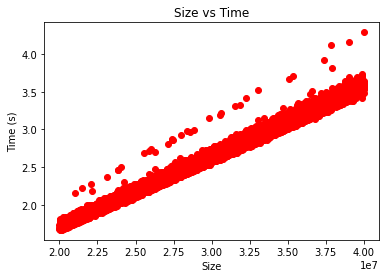

In [0]:
plt.scatter(X_train, Y_train, color = 'red')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

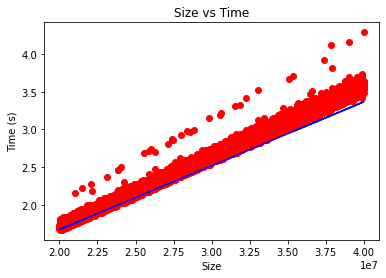

In [0]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, Y_train_pred, color = 'blue')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

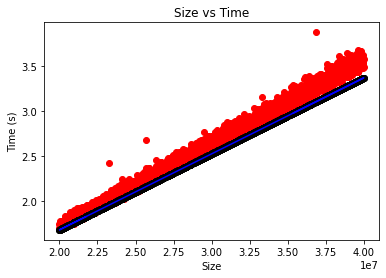

In [0]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, Y_train_pred, color = 'blue')
plt.scatter(X_test, Y_test_pred, color = 'black')
plt.title('Size vs Time')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.show()

# **Evaluate**

**Kết quả tệ hơn**

**Đánh giá model. Ở đây em dùng độ đo R2_score của thư viện sklearn.metrics để đánh giá độ tốt của model. Kết quả cho ra 0.92757 cho tập train và 0.93208 cho tập test. Kết quả khá cao -> Đây là 1 model tốt với bộ dữ liệu này nhưng tệ hơn kha khá với bộ dữ liệu ở round 2 khi độ chính xác ở round 2 lên tới 99% thì ở đây chỉ 92 - 93%.**

In [0]:
from sklearn.metrics import r2_score
print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.9275707702469379
0.9320815137309177


# **New model**

In [0]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

**Tạo một ma trận có số hàng = len(X) và số cột = 3.
Cột đầu tiên được gán giống với dữ liệu cũ.
Cột thứ 2 được gán với dữ liệu cũ bình phương.
Cột thứ 3 được gán với dữ liệu cũ lập phương.**

In [0]:
import numpy as np
X_new = np.zeros((len(X),3))

for i in range(X.shape[0]):
    X_new[i, 0] = X[i]
    X_new[i, 1] = X[i]*X[i]
    X_new[i, 2] = X[i]*X[i]*X[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys


In [0]:
Y_new = Y

**Chia bộ dữ liệu thành 2 phần là train và test với train size = 80%.**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, train_size = 0.8, random_state = 0)

**Vẫn sử dụng linear regression cho bài dự đoán này**

In [0]:
from sklearn.linear_model import LinearRegression

**Train model bằng phương thức fit**

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_train_pred = lin_reg.predict(X_train)
Y_test_pred = lin_reg.predict(X_test)

# **Evaluate**

**Đánh giá model. Ở đây em dùng độ đo R2_score của thư viện sklearn.metrics để đánh giá độ tốt của model. Kết quả cho ra 0.98781 cho tập train và 0.98977 cho tập test. Kết quả khá cao -> Đây là 1 model tốt.**

**Performance so với model cũ là tốt hơn. 0.98781 > 0.92757(Tập train) 0.98977 > 0.93208 (Tập test). Do số lượng features cũng như bộ dữ liệu được tăng lên đáng kể. Và 2 features được thêm vào lúc sau có mức độ liên quan với giá trị dự đoán gần bằng với features đầu tiên.**

In [0]:
from sklearn.metrics import r2_score
print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.9878184818854974
0.9897745803177237
